In [11]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(ggrepel))
setwd("/rds/general/user/emacdona/projects/covid19-transcriptome/live/sc_rnaseq/DEG/")

In [2]:
input<-fread("GSEA_1-5_input_new.txt",data.table=FALSE,header=FALSE)

In [3]:
new_input<-input

In [4]:
# Comparison 1 Severity: mild_moderate vs severe_critical
df1<-apply(new_input[new_input$V3==1,],1,function(x){
    if(file.exists(paste0("./level_",x[[2]],"/comp_1/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_1/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results1)>0){
            results1$gene<-rownames(results1)
            results1$level<-x[[2]]
            results1$comp<-1
            results1$cell_type<-x[[1]]
            return(results1)
        }
    } 
})


In [5]:
df1<-do.call(rbind,df1)
head(df1)
dim(df1)

,beta,pval,qval,Singular,Conv,gene,level,comp,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1.TPST1,1.553021,1.478969e-04,0.0067545885,0,0,TPST1,1,1,monocyte
1.THBS1,1.448876,1.380503e-05,0.0009518345,0,0,THBS1,1,1,monocyte
1.AREG,1.316125,2.418856e-03,0.0499040834,0,0,AREG,1,1,monocyte
1.MT1H,1.264341,1.918249e-02,0.1807788652,0,0,MT1H,1,1,monocyte
1.CLU,1.192703,1.915751e-04,0.0083226159,0,0,CLU,1,1,monocyte
1.HP,1.124375,1.814390e-04,0.0079795826,0,0,HP,1,1,monocyte


[1] 29642     9

In [6]:
df1<- df1 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))

In [7]:
#need to write out to file
sig<-df1[df1$qval<0.05,]
sig<-sig[order(sig$qval),]
head(sig)
dim(sig)

,beta,pval,qval,Singular,Conv,gene,level,comp,cell_type,colour
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
8.APOBEC3B,1.3459063,2.251232e-173,8.942394e-171,0,0,APOBEC3B,1,1,B,Upregulated P<0.05
55.LGALS2,-0.7522413,1.831751e-143,9.904538e-141,0,0,LGALS2,4,1,CD14mono_IFN,Downregulated P<0.05
1.TNF,-0.9546168,2.582948e-118,6.419527e-116,0,0,TNF,1,1,monocyte,Downregulated P<0.05
29.IFITM1,0.7699390,7.893039e-82,5.193056e-79,0,0,IFITM1,2,1,DC2,Upregulated P<0.05
58.IFITM1,0.7699390,7.893039e-82,5.193056e-79,0,0,IFITM1,4,1,DC2,Upregulated P<0.05
7.MTRNR2L8,1.5238263,1.970954e-72,1.135762e-69,0,0,MTRNR2L8,1,1,RBC,Upregulated P<0.05


[1] 255  10

In [9]:
write.table(sig,"sig_DEG_comp_1_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")
write.table(df1,"sig_DEG_comp_1_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 77 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


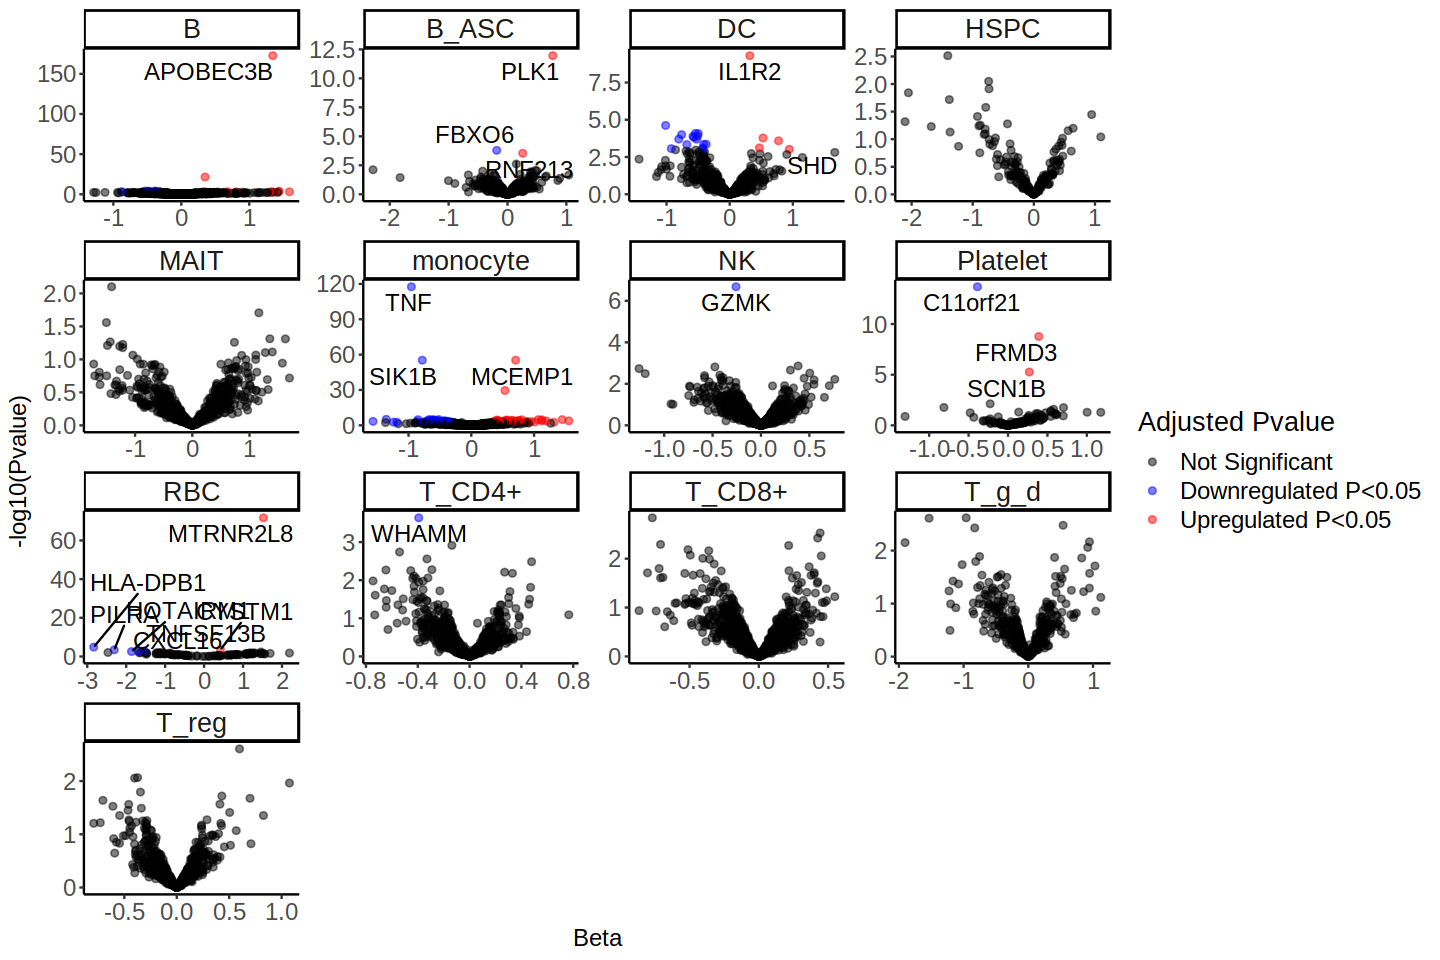

In [13]:
# Level 1

cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df1[df1$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df1[df1$level==1,],qval<0.05),aes(label=df1[df1$level==1 & df1$qval<0.05,"gene"]),size=5,colour="black")

Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


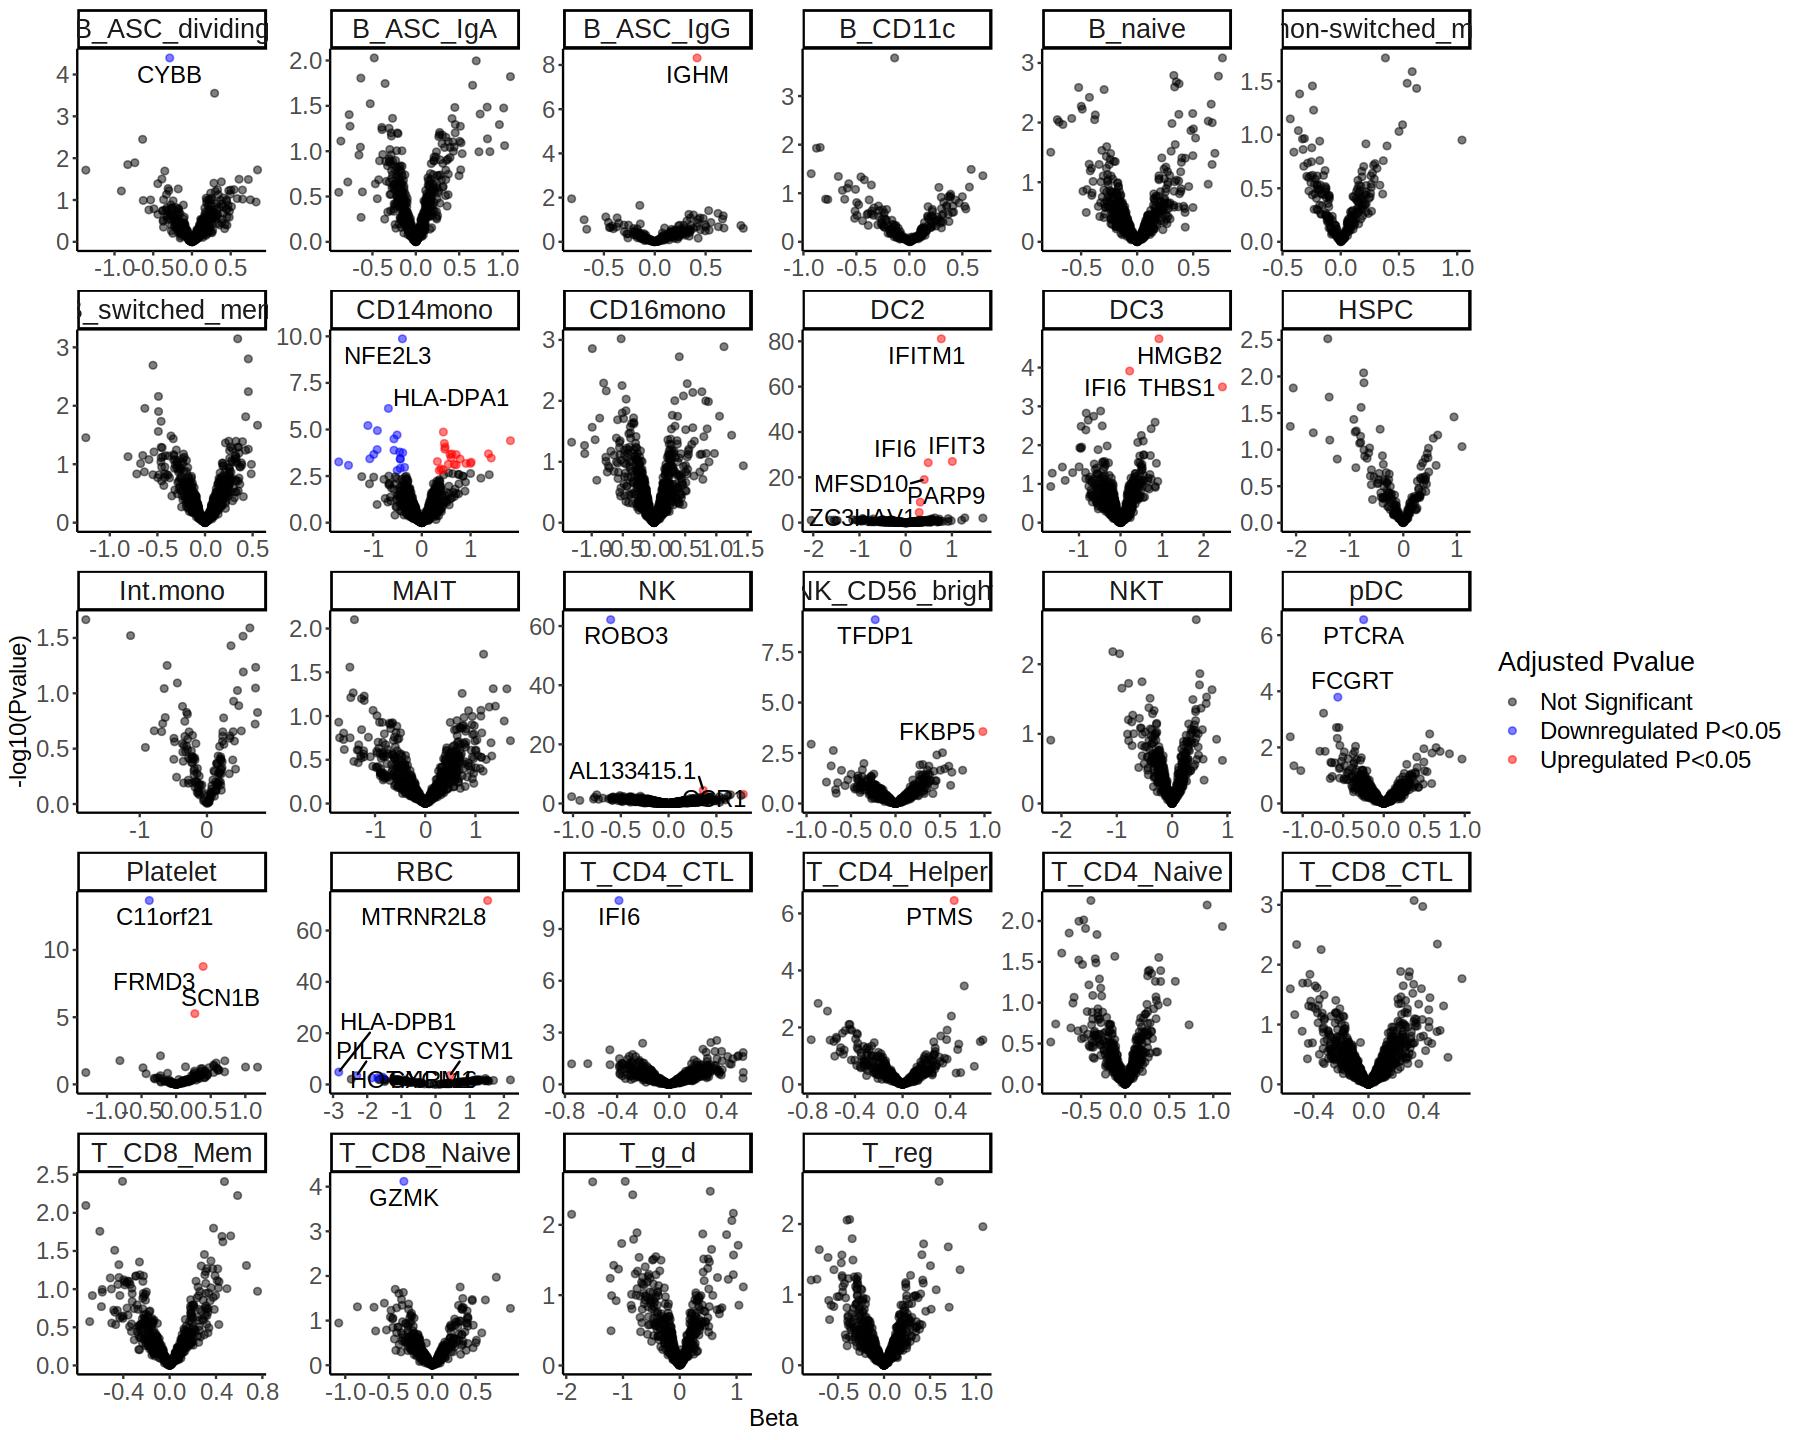

In [12]:
# Level 2 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df1[df1$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df1[df1$level==2,],qval<0.05),aes(label=df1[df1$level==2 & df1$qval<0.05,"gene"]),size=5,colour="black")

In [15]:
df2<-apply(new_input[new_input$V3==2,],1,function(x){
    if(file.exists(paste0("./level_",x[[2]],"/comp_2/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_2/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results2)>0){
            results2$gene<-rownames(results2)
            results2$level<-x[[2]]
            results2$comp<-2
            results2$cell_type<-x[[1]]
            return(results2)
        }  
    }
})


In [16]:
df2<-do.call(rbind,df2)
head(df2)
dim(df2)

,beta,pval,qval,Singular,Conv,gene,level,comp,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
66.VSIG4,2.507301,0.006485995,0.2916303,0,0,VSIG4,1,2,monocyte
66.NT5DC2,2.200641,0.006242187,0.2861489,0,0,NT5DC2,1,2,monocyte
66.RPH3A,2.001956,0.081529819,0.9999673,0,0,RPH3A,1,2,monocyte
66.SEMA6B,1.948501,0.067931993,0.9999673,0,0,SEMA6B,1,2,monocyte
66.CAVIN3,1.936006,0.023047075,0.7115643,0,0,CAVIN3,1,2,monocyte
66.SNHG19,1.876636,0.033489031,0.8534140,0,0,SNHG19,1,2,monocyte


[1] 14148     9

In [17]:
df2<- df2 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))


In [14]:
#need to write out to file
sig<-df2[df2$qval<0.05,]
sig<-sig[order(sig$qval),]
write.table(sig,"sig_DEG_comp_2_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")
write.table(df2,"sig_DEG_comp_2_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [24]:
df3<-apply(new_input[new_input$V3==3,],1,function(x){
    if(file.exists(paste0("./level_",x[[2]],"/comp_3/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_3/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results3)>0){
            results3$gene<-rownames(results3)
            results3$level<-x[[2]]
            results3$comp<-3
            results3$cell_type<-x[[1]]
            return(results3)
        } 
    }
})


In [25]:
df3<-do.call(rbind,df3)
head(df3)
dim(df3)

,beta,pval,qval,Singular,Conv,gene,level,comp,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
131.C1QC,1.646585,6.545289e-04,1.315513e-02,0,0,C1QC,1,3,monocyte
131.CLU,1.607035,1.119340e-05,7.900181e-04,0,0,CLU,1,3,monocyte
131.IFIT1,1.451136,3.002290e-04,7.894255e-03,0,0,IFIT1,1,3,monocyte
131.C1QB,1.320766,8.087052e-04,1.490685e-02,0,0,C1QB,1,3,monocyte
131.NEXN,1.314292,5.202606e-06,4.073983e-04,0,0,NEXN,1,3,monocyte
131.SIGLEC1,1.286592,3.452539e-74,9.259710e-72,0,0,SIGLEC1,1,3,monocyte


[1] 30550     9

In [26]:
df3<- df3 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))

In [101]:
#need to write out to file
sig<-df3[df3$qval<0.05,]
sig<-sig[order(sig$qval),]
write.table(sig,"sig_DEG_comp_3_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")
write.table(df3,"sig_DEG_comp_3_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

Warning message:
“ggrepel: 295 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 136 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 213 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 90 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 157 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 156 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


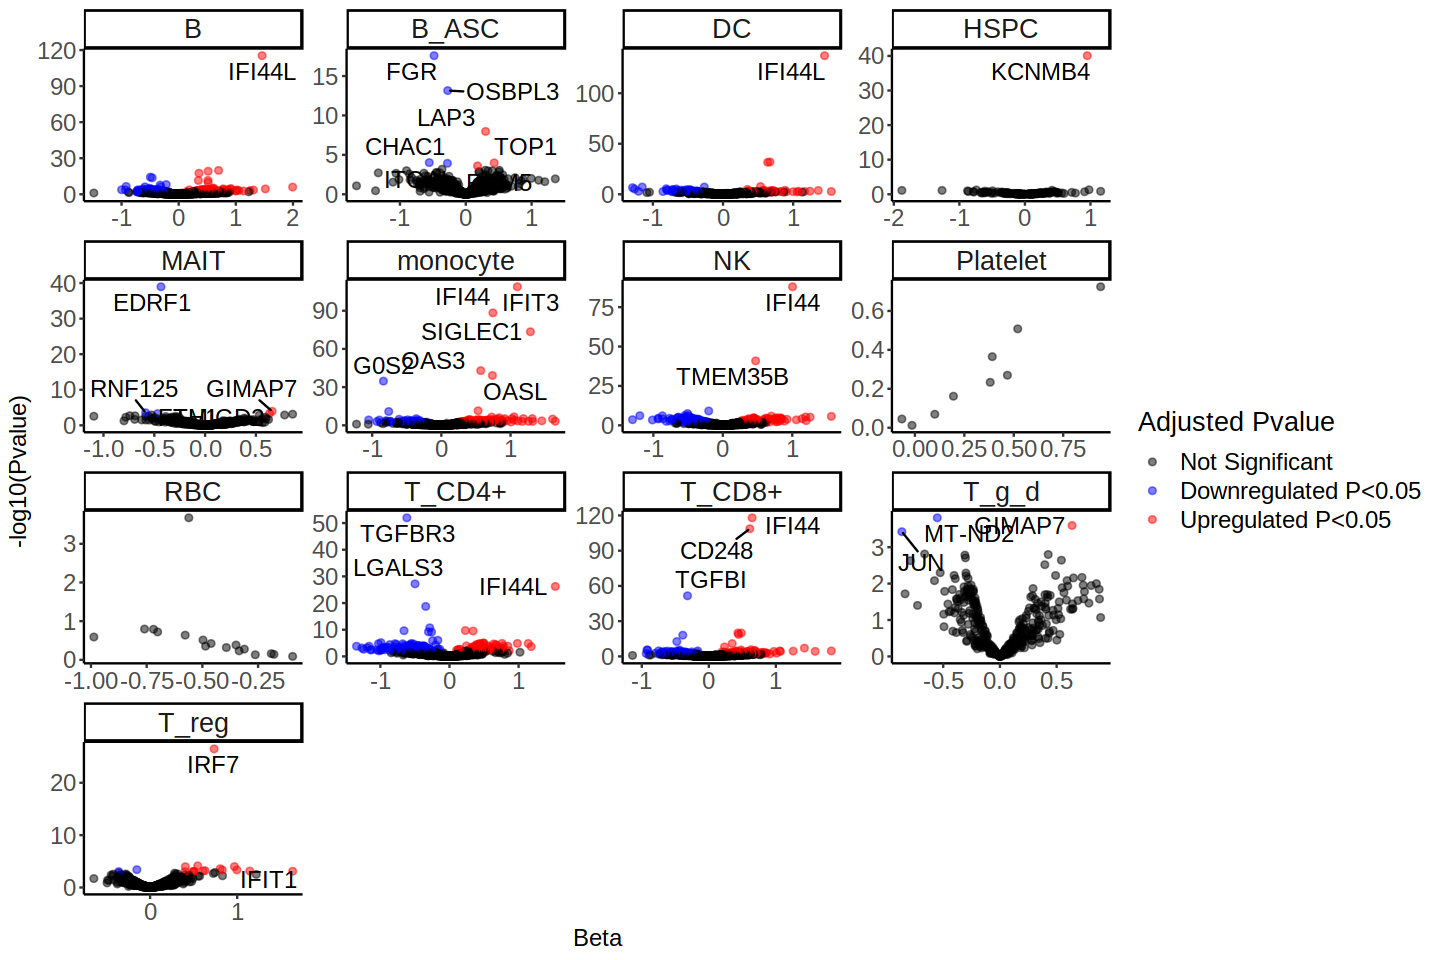

In [27]:
# Level 1

cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df3[df3$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df3[df3$level==1,],qval<0.05),aes(label=df3[df3$level==1 & df3$qval<0.05,"gene"]),size=5,colour="black")

Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 164 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 76 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 121 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 103 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 33 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 47 unlabe

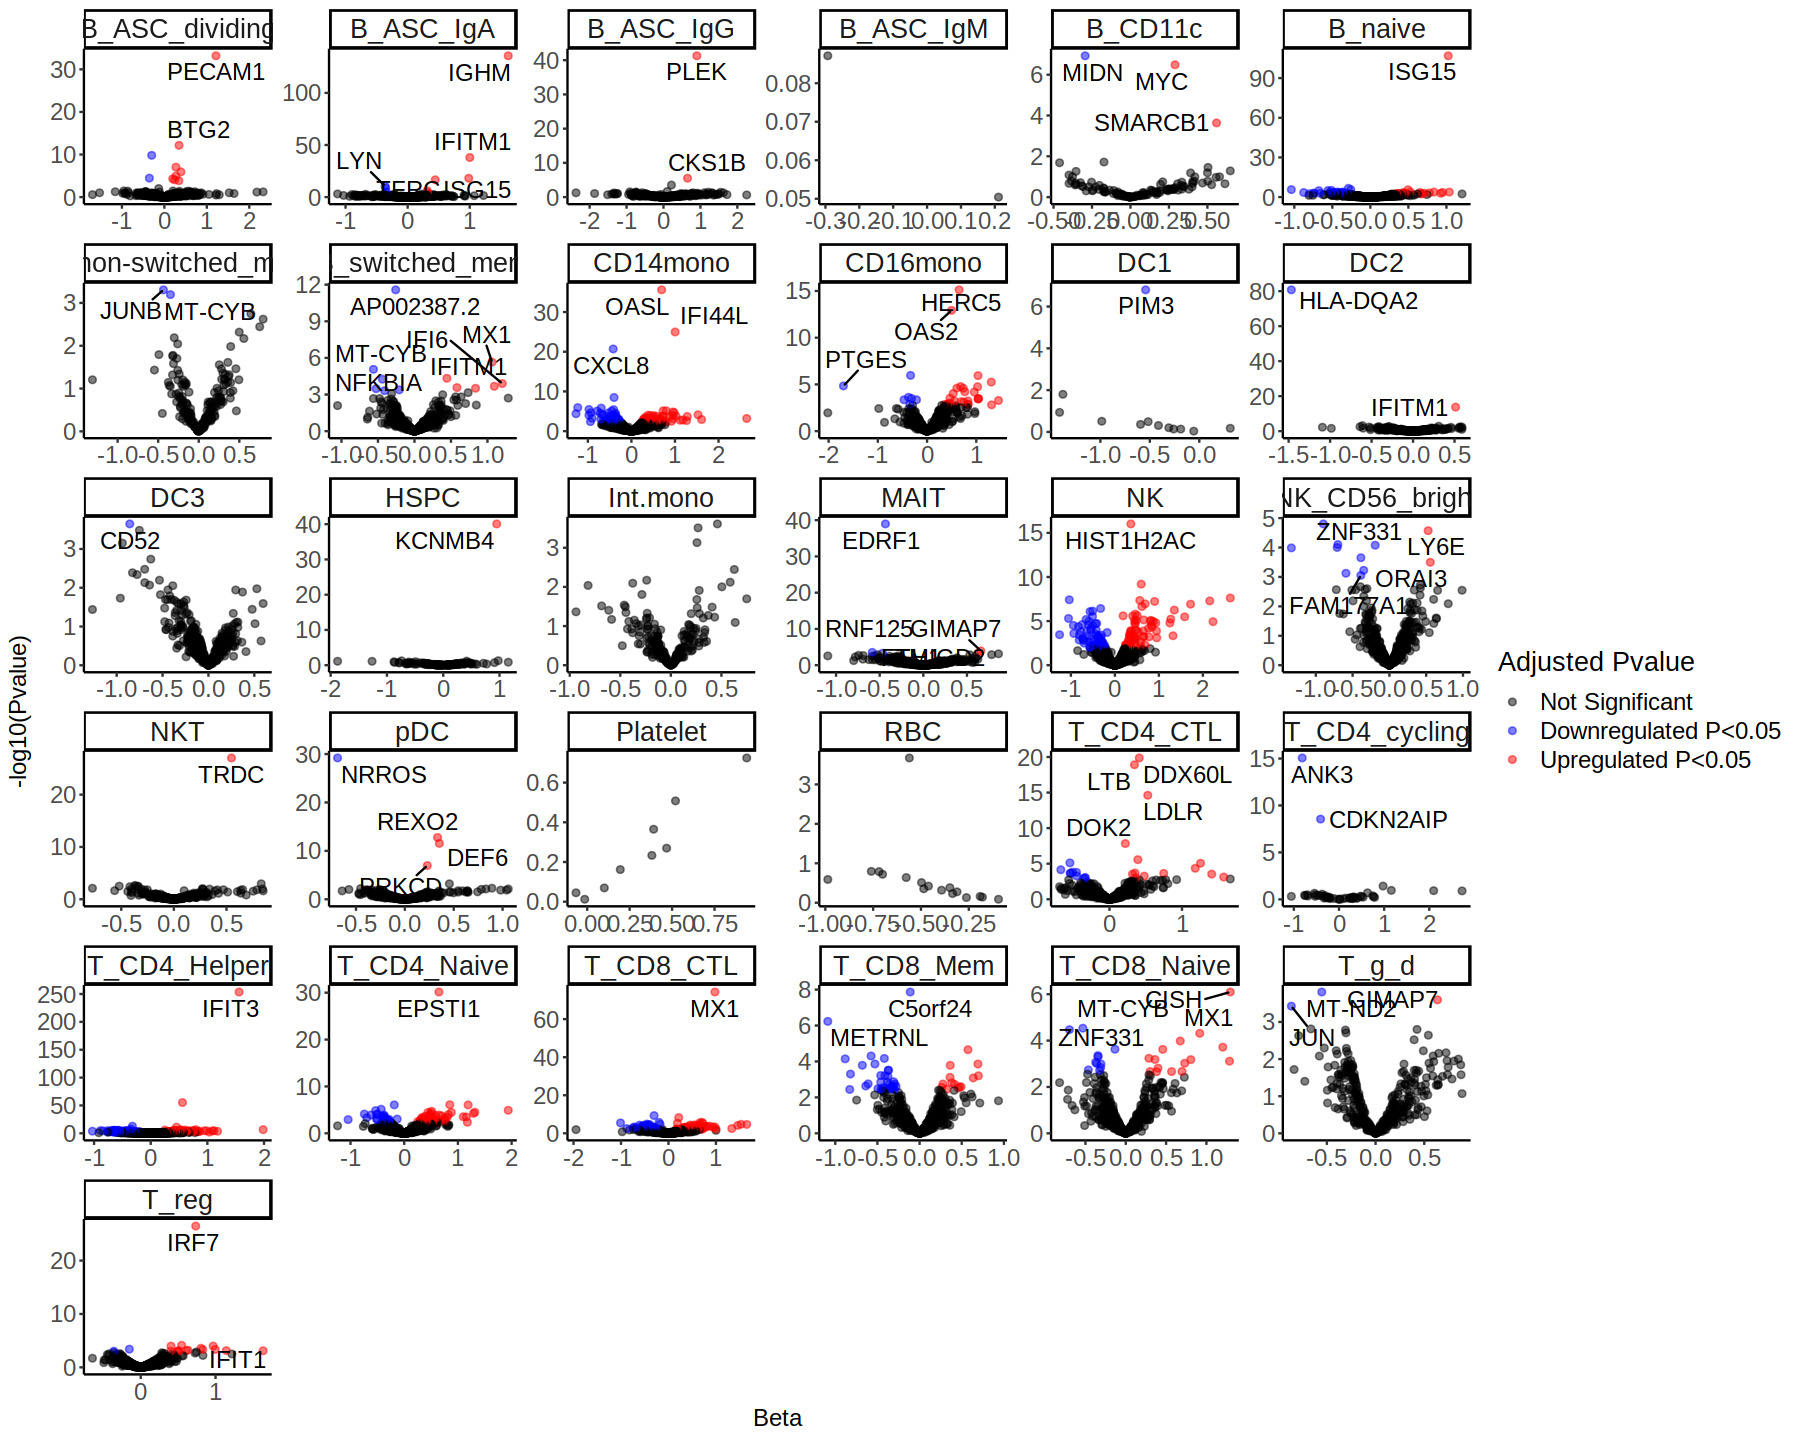

In [28]:
# Level 2 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df3[df3$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df3[df3$level==2,],qval<0.05),aes(label=df3[df3$level==2 & df3$qval<0.05,"gene"]),size=5,colour="black")

In [34]:
df4<-apply(new_input[new_input$V3==4,],1,function(x){
    if(file.exists(paste0("./level_",x[[2]],"/comp_4/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_4/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results4)>0){
            #print(head(results4))
            results4$gene<-rownames(results4)
            results4$level<-x[[2]]
            results4$comp<-4
            results4$cell_type<-x[[1]]
            return(results4)
        }   
    }
})


In [35]:
dftmp<-df4[-which(lapply(df4,is.null) == T)]
df4<-dftmp

df4<-do.call(rbind,df4)
head(df4)
dim(df4)

,beta,pval,qval,Singular,Conv,gene,level,comp,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
196.UPK3A,0.3229635,0.3236145,0.9973005,0,0,UPK3A,1,4,monocyte
196.SELL,0.2917356,0.1687569,0.9973005,0,0,SELL,1,4,monocyte
196.ANKRD9,0.2748682,0.3210058,0.9973005,0,0,ANKRD9,1,4,monocyte
196.LINC00957,0.2665185,0.4479057,0.9973005,0,0,LINC00957,1,4,monocyte
196.ZBED3,0.2548543,0.4126435,0.9973005,0,0,ZBED3,1,4,monocyte
196.ZDHHC18,0.2514568,0.2249461,0.9973005,0,0,ZDHHC18,1,4,monocyte


[1] 2383    9

In [36]:
df4<- df4 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))


In [112]:
#need to write out to file
sig<-df4[df4$qval<0.05,]
sig<-sig[order(sig$qval),]
write.table(sig,"sig_DEG_comp_4_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")
write.table(df4,"sig_DEG_comp_4_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

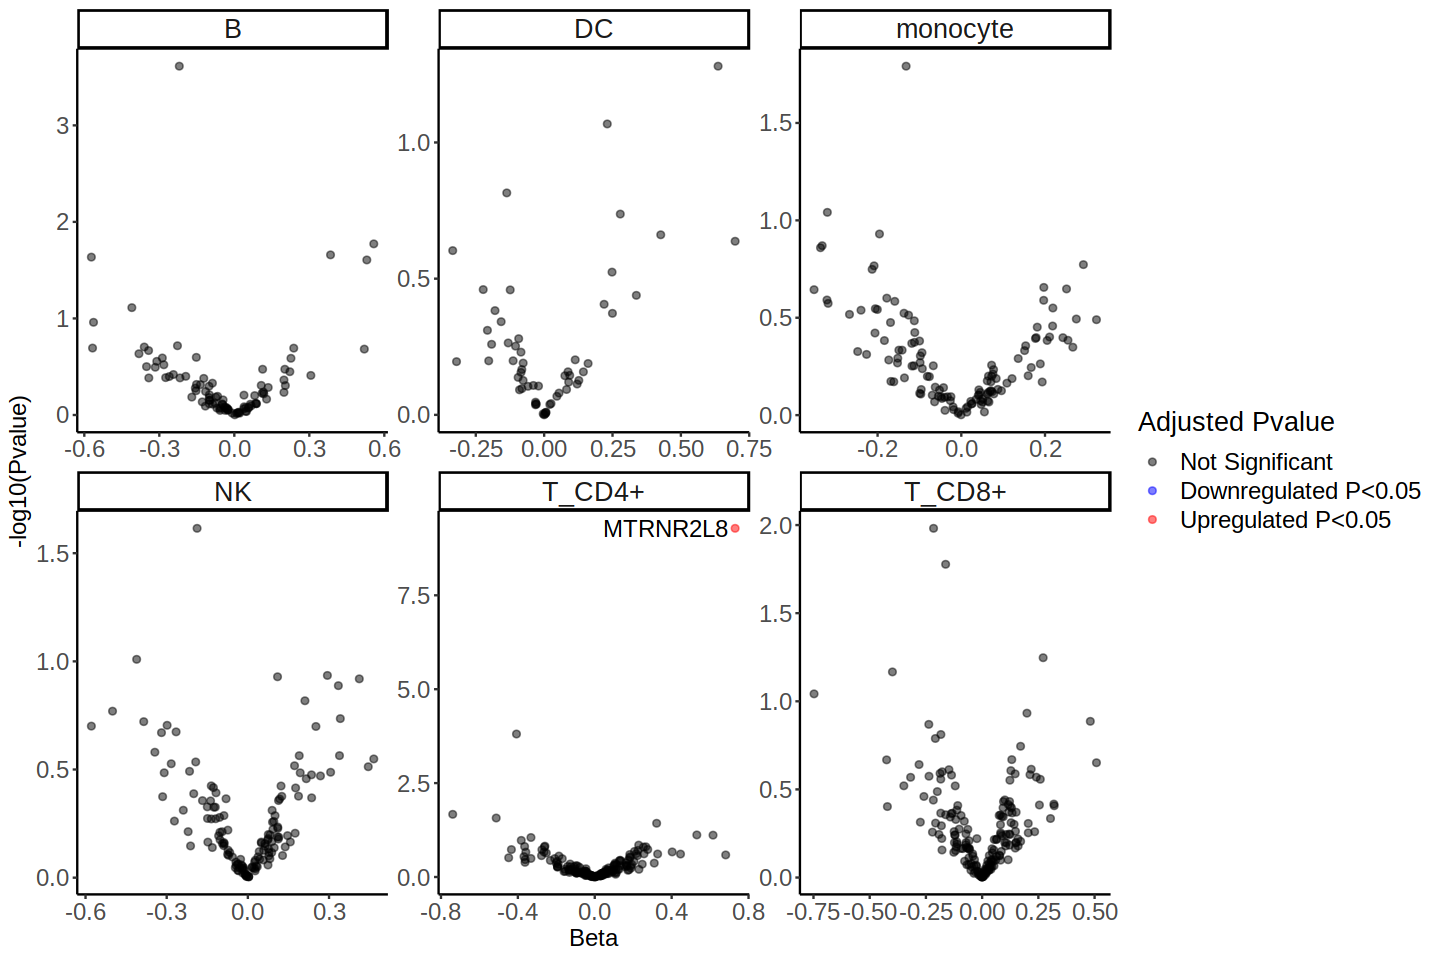

In [37]:
# Level 1

cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df4[df4$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df4[df4$level==1,],qval<0.05),aes(label=df4[df4$level==1 & df4$qval<0.05,"gene"]),size=5,colour="black")

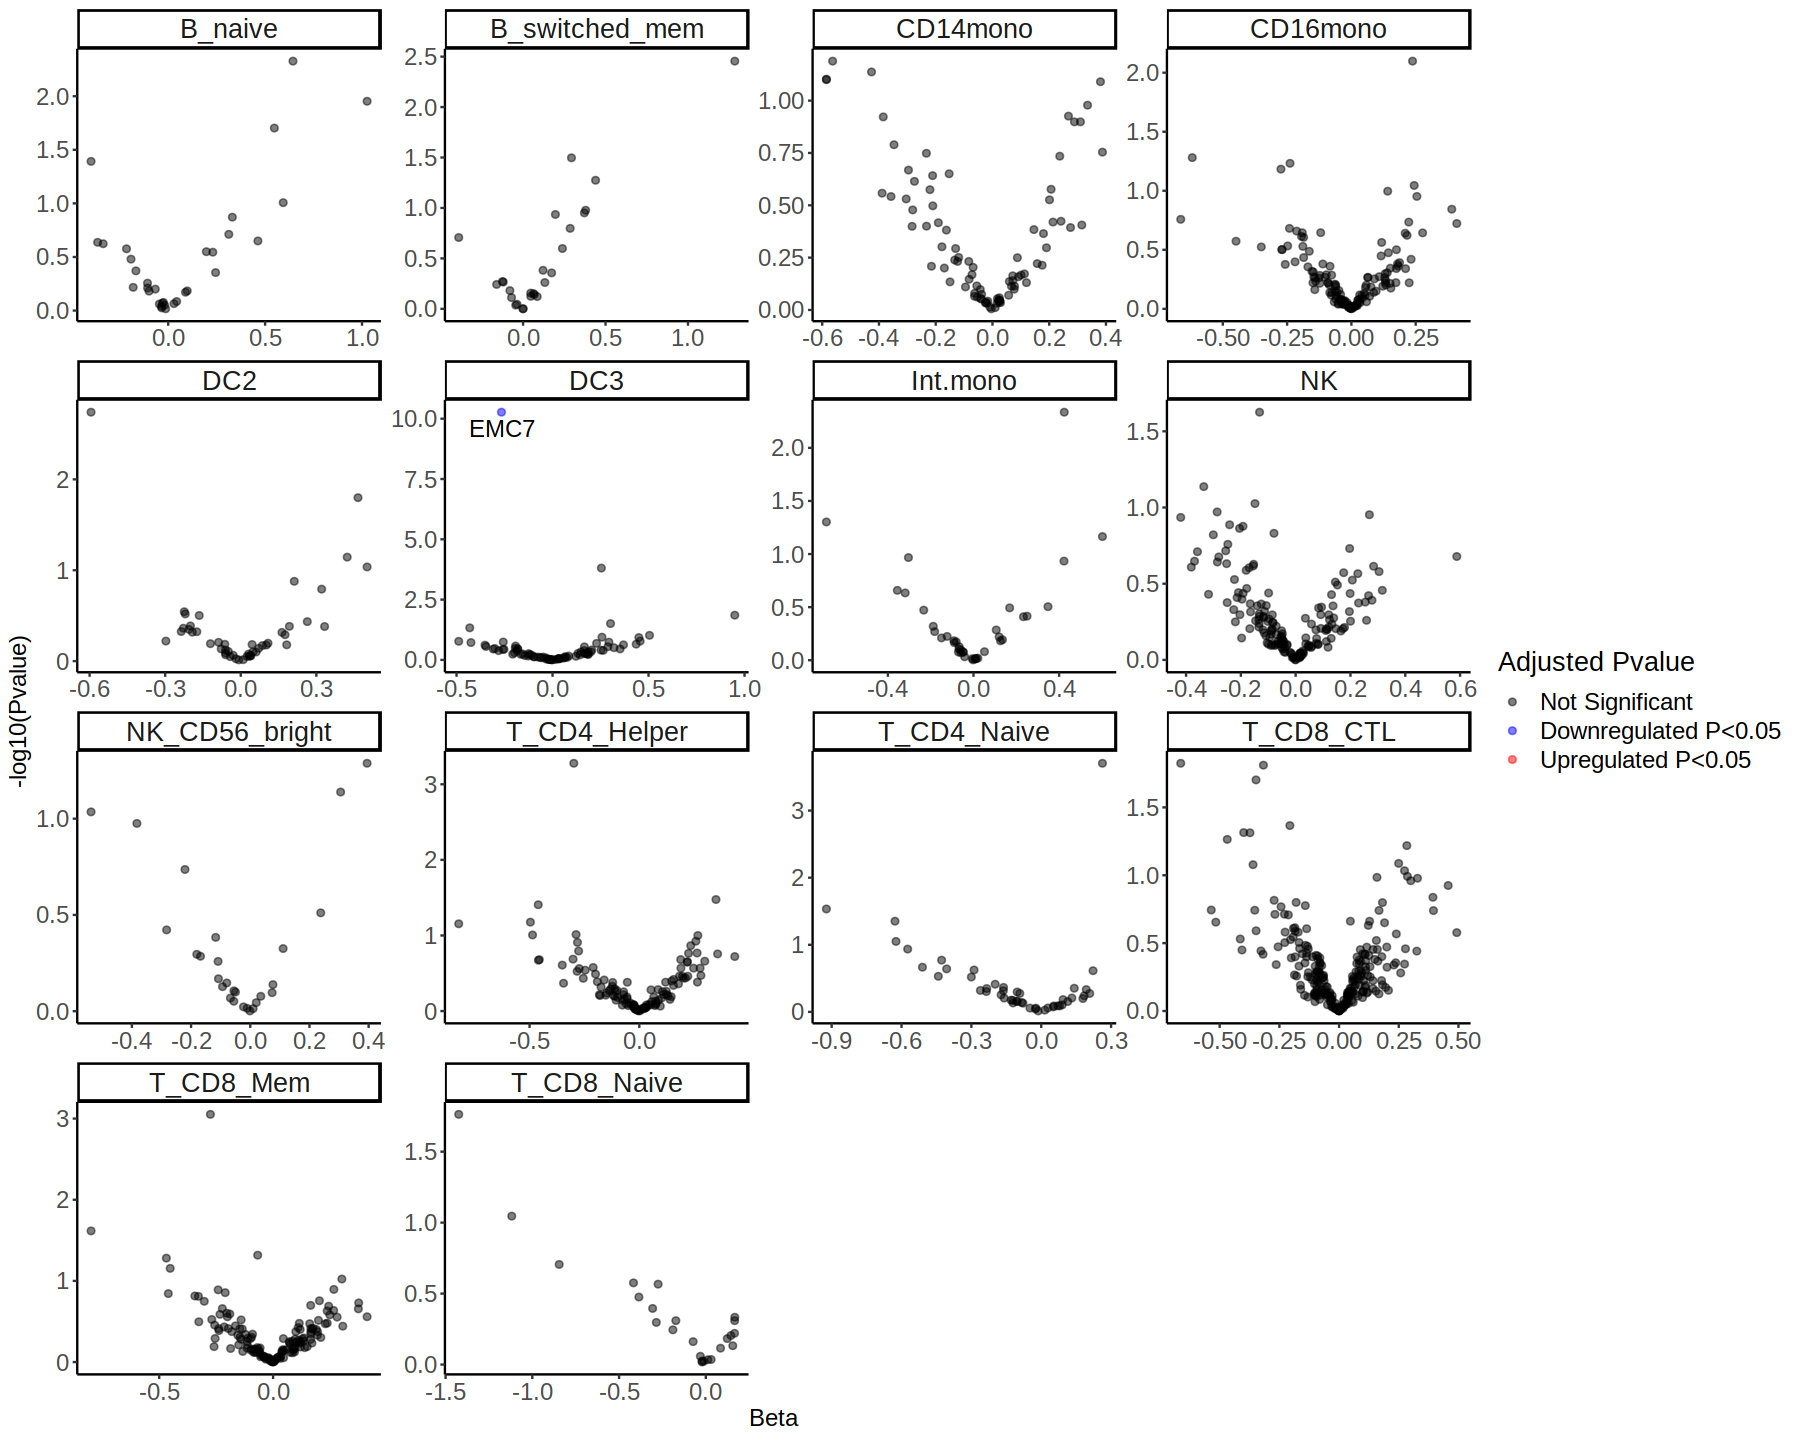

In [38]:
# Level 2 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df4[df4$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df4[df4$level==2,],qval<0.05),aes(label=df4[df4$level==2 & df4$qval<0.05,"gene"]),size=5,colour="black")

In [39]:
df5<-apply(new_input[new_input$V3==5,],1,function(x){
    if(file.exists(paste0("./level_",x[[2]],"/comp_5/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_5/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results5)>0){
            results5$gene<-rownames(results5)
            results5$level<-x[[2]]
            results5$comp<-5
            results5$cell_type<-x[[1]]
            return(results5)
        }
    }
})


In [40]:
dftmp<-df5[-which(lapply(df5,is.null) == T)]
df5<-dftmp

df5<-do.call(rbind,df5)
head(df5)
dim(df5)

,beta,pval,qval,Singular,Conv,gene,level,comp,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
261.DEFB1,3.456781,3.440708e-05,0.0016148078,0,0,DEFB1,1,5,monocyte
261.HESX1,2.975609,2.868014e-06,0.0002554003,0,0,HESX1,1,5,monocyte
261.OTOF,2.857620,1.058021e-04,0.0034556503,0,0,OTOF,1,5,monocyte
261.MFGE8,2.702867,9.968105e-04,0.0164908175,0,0,MFGE8,1,5,monocyte
261.MT1M,2.445488,2.272856e-04,0.0058184004,0,0,MT1M,1,5,monocyte
261.TPST1,2.432332,1.407072e-03,0.0207972446,0,0,TPST1,1,5,monocyte


[1] 12847     9

In [41]:
df5<- df5 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))

In [25]:
#need to write out to file
sig<-df5[df5$qval<0.05,]
sig<-sig[order(sig$qval),]

write.table(sig,"sig_DEG_comp_5_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")
write.table(df5,"sig_DEG_comp_5_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 43 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 44 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 149 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


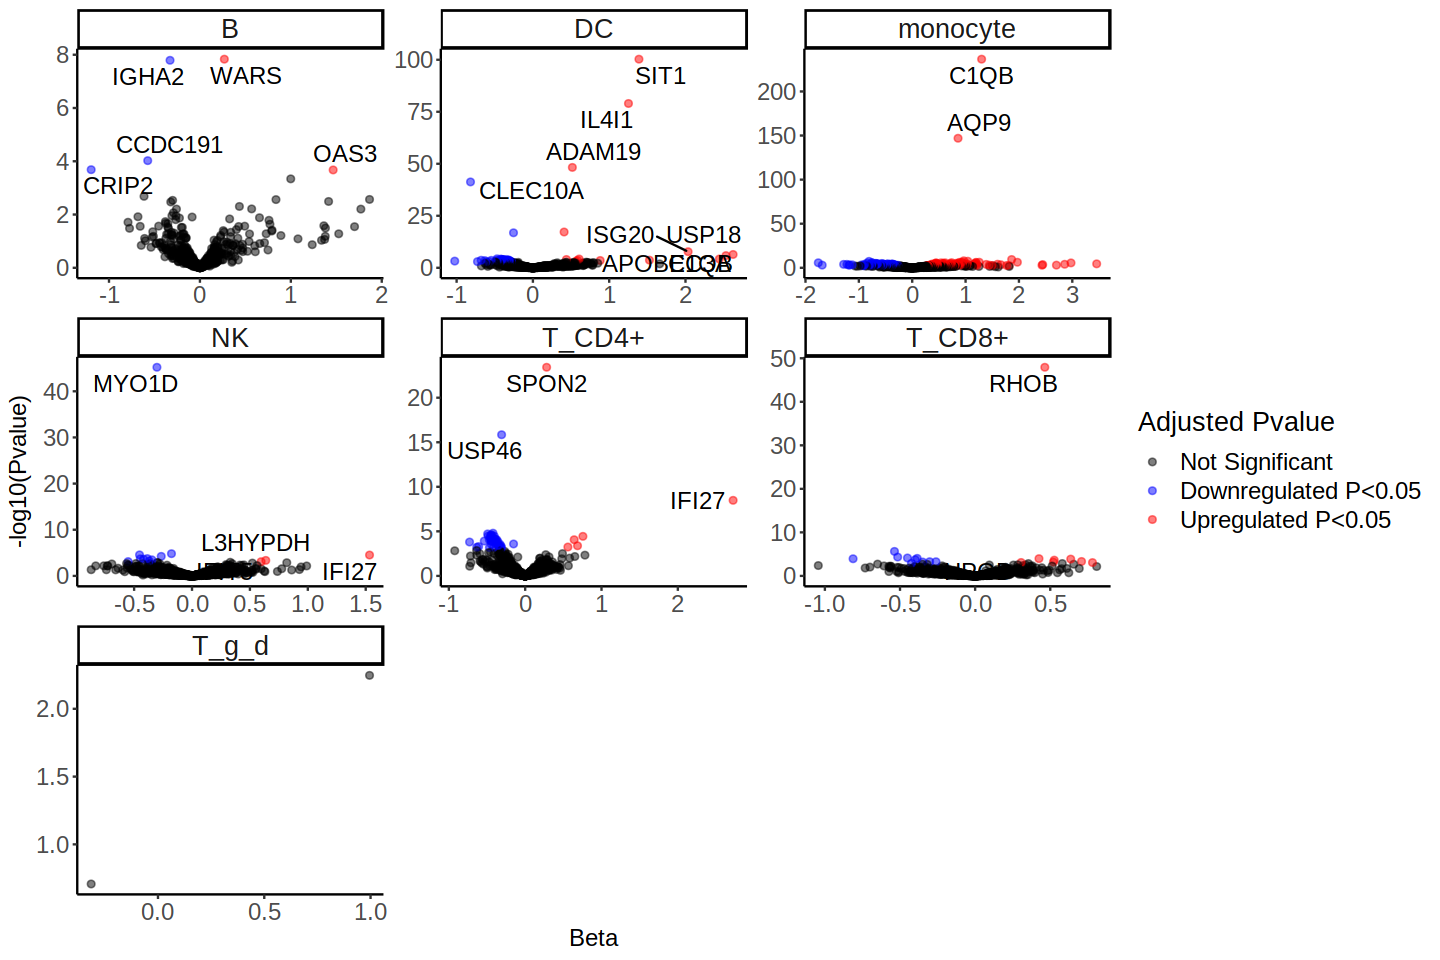

In [42]:
cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df5[df5$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df5[df5$level==1,],qval<0.05),aes(label=df5[df5$level==1 & df5$qval<0.05,"gene"]),size=5,colour="black")
  
       
      

Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 120 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


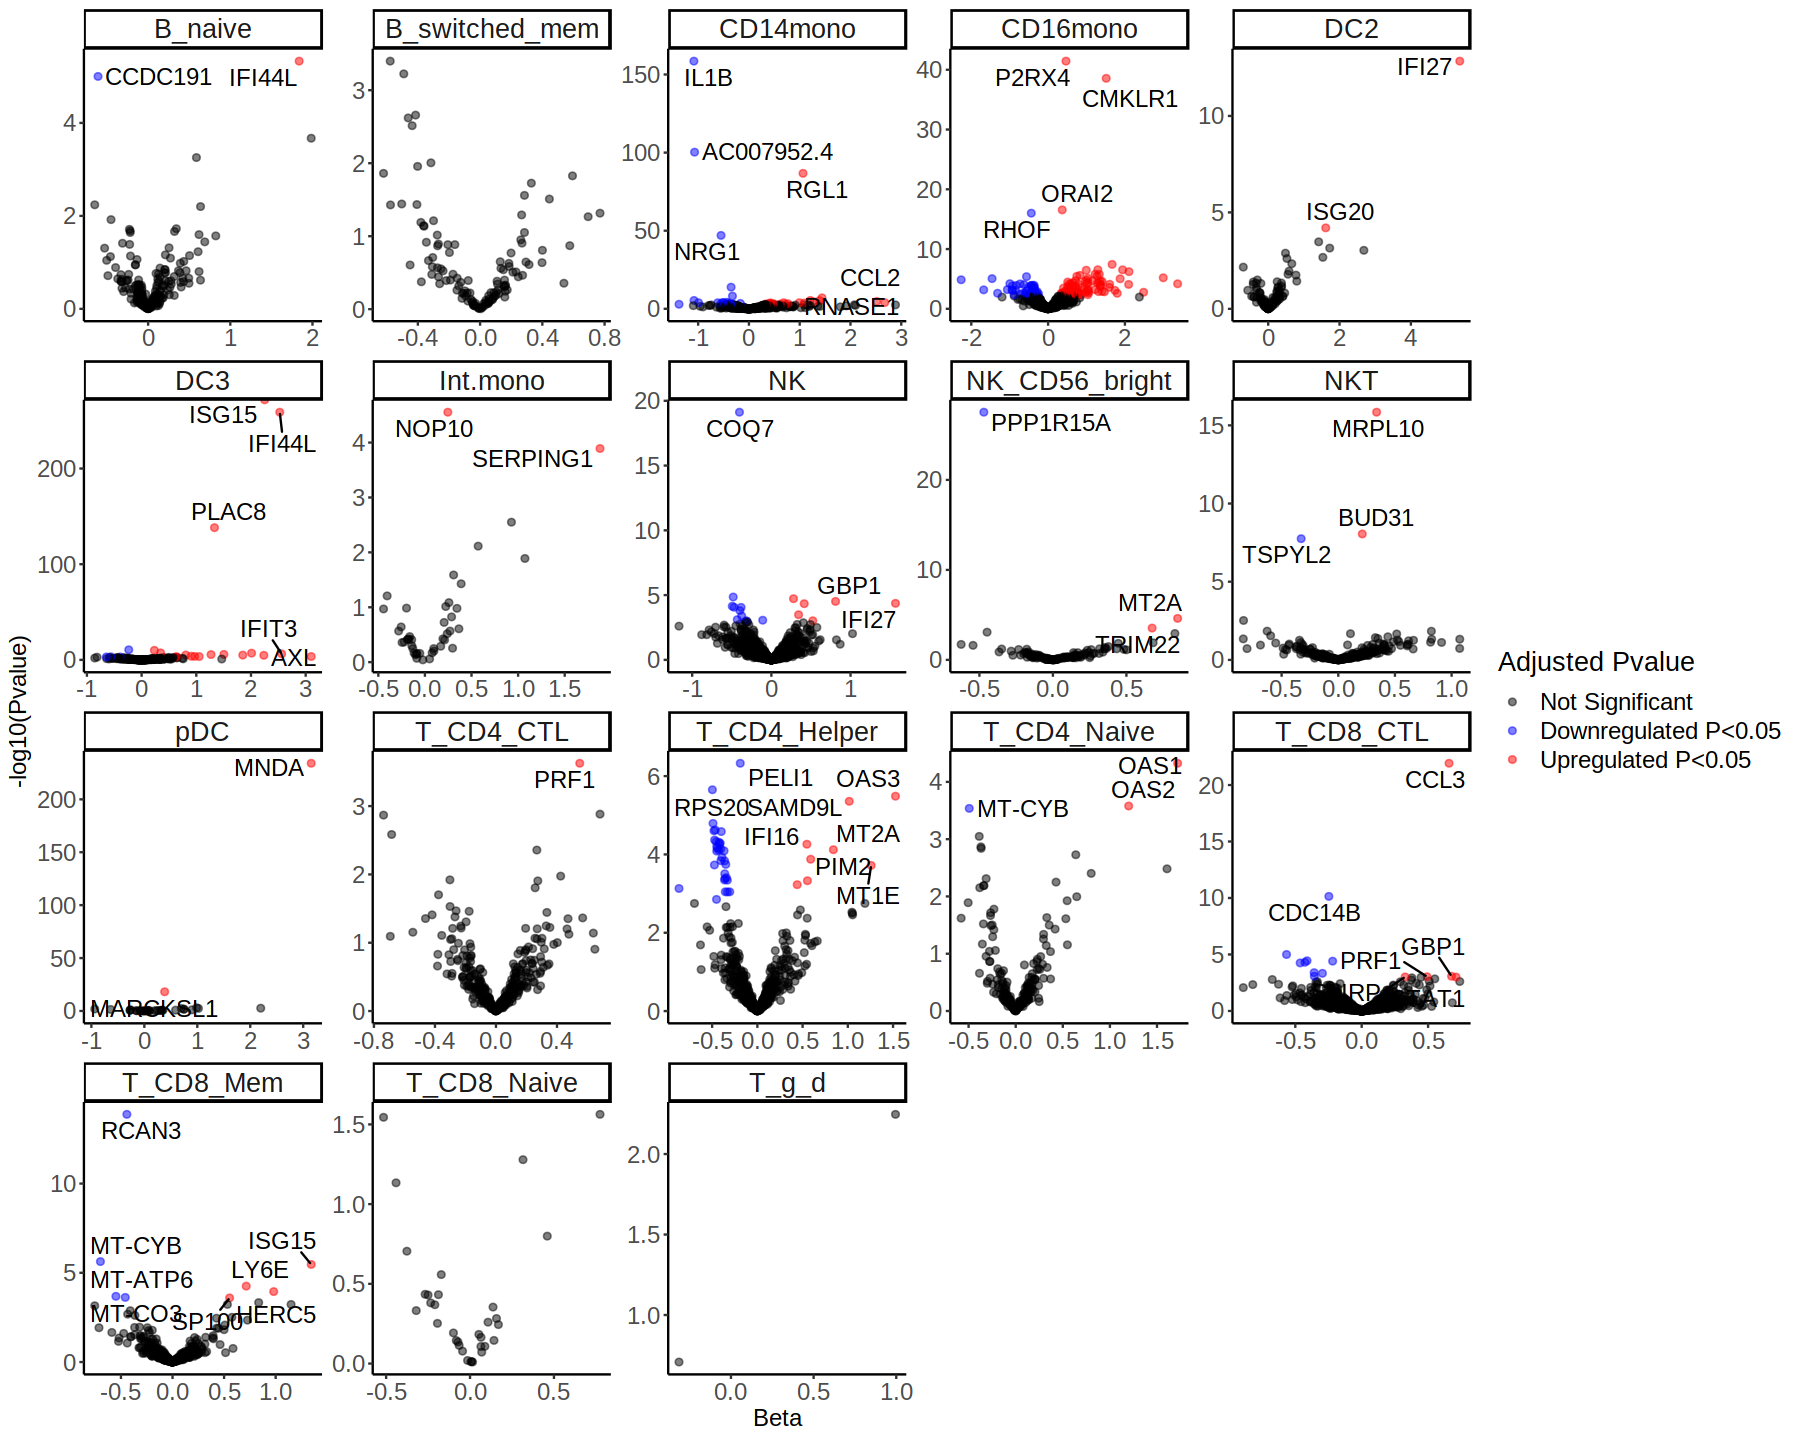

In [43]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df5[df5$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df5[df5$level==2,],qval<0.05),aes(label=df5[df5$level==2 & df5$qval<0.05,"gene"]),size=5,colour="black")
  